# Customer Churn Prediction

## Part 1 - DEFINE

## ---- 1 Define the problem ----    

The most important asset in any company is is the people—the human capita. It’s important to find great talent, and more importantly to keep the great talent happy and loyal to the company.   

Salary, without a doubt is a great factor in attracting great people and keep people happy in the organization.   

In this project, we want to find out:    

With the data available, can we develop a model that predicts the salary for a specific job and profile?    

How accurate can we get?    

In [1]:
# Import your libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
sns.set(style='dark')

# My info here
__author__ = "Sha Brown"
__email__ = "sha821@gmail.com"

# Part 2 - DISCOVER

## ---- 2 Load the data ----

In [2]:
# Load the data into a Pandas dataframe
customer_df = pd.read_csv('customer_churn.csv')

In [3]:
# Display the shape of the dataframe
customer_df.shape

(900, 10)

In [4]:
# Display the first 5 rows
customer_df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.00,"11,066.80",0,7.22,8.00,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.00,"11,916.22",0,6.50,11.00,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.00,"12,884.75",0,6.67,12.00,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.00,"8,010.76",0,6.71,10.00,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.00,"9,191.58",0,5.56,9.00,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [5]:
# Show the summary statistics of the dataframe
customer_df.describe()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
count,900.00,900.00,900.00,900.00,900.00,900.00
mean,41.82,"10,062.82",0.48,5.27,8.59,0.17
std,6.13,"2,408.64",0.50,1.27,1.76,0.37
min,22.00,100.00,0.00,1.00,3.00,0.00
25%,38.00,"8,497.12",0.00,4.45,7.00,0.00
50%,42.00,"10,045.87",0.00,5.21,8.00,0.00
75%,46.00,"11,760.10",1.00,6.11,10.00,0.00
max,65.00,"18,026.01",1.00,9.15,14.00,1.00


## ---- 3 Check the quality of the data ----

In [6]:
# check to see if there are duplicated entries
customer_df.duplicated().sum()

0

In [7]:
# check to see if there are null values
customer_df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

## ---- 4 Data Processing ----

### Process 'Location'

In [8]:
def extract_state(string):
    if string[-5] == '-':
        state = string[-13:-11]
    else:
        state = string[-8:-6]
    return state

In [9]:
customer_df['State'] = customer_df['Location'].apply(extract_state)

In [10]:
churn_by_state = pd.DataFrame(customer_df.groupby('State')['Churn'].mean().sort_values(ascending=False))

## ---- 3 Explore the data (EDA) ----

### Visualize feature and target variables

In [11]:
def plot_box_dist(df, col):
    ''' 
    Makes boxplot and distribution plot side by side.
    
    Args:
    
    df(dataframe): pandas dataframe
    col(str): column name
    
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df[col], orient='v')
    plt.subplot(1,2,2)
    sns.distplot(df[col], bins=20)

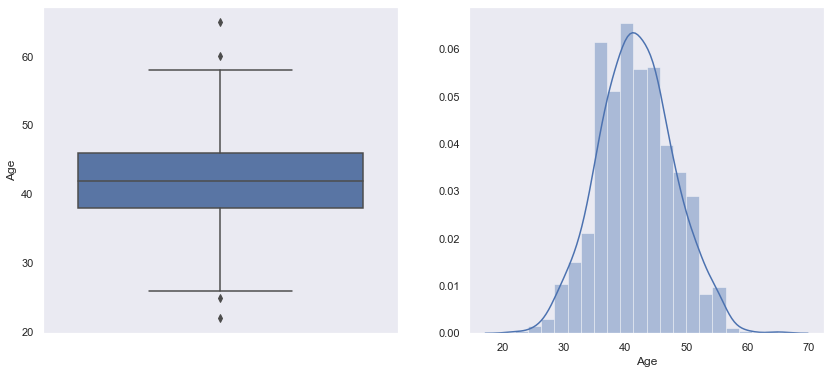

In [12]:
plot_box_dist(customer_df, 'Age')

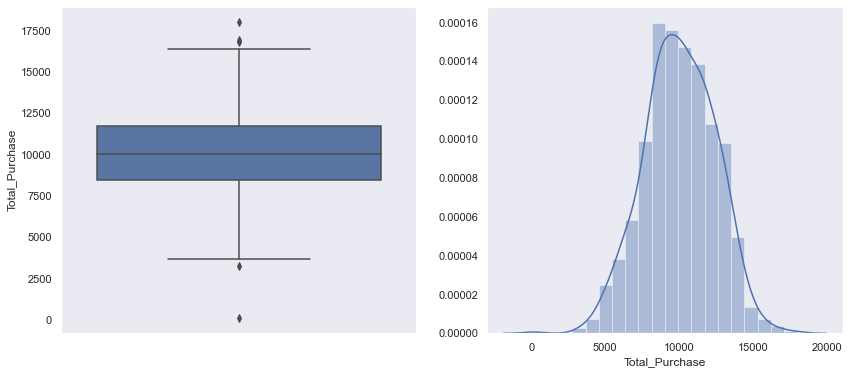

In [13]:
plot_box_dist(customer_df, 'Total_Purchase')

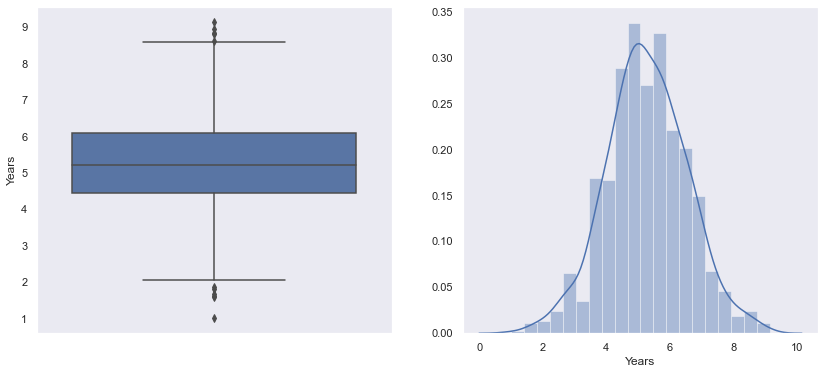

In [14]:
plot_box_dist(customer_df, 'Years')

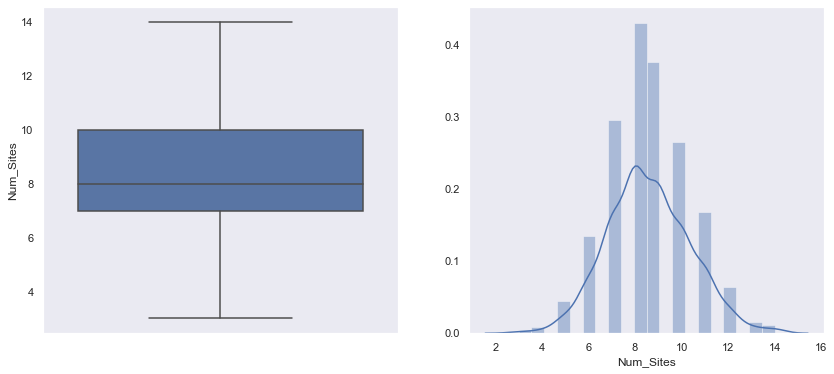

In [15]:
plot_box_dist(customer_df, 'Num_Sites')

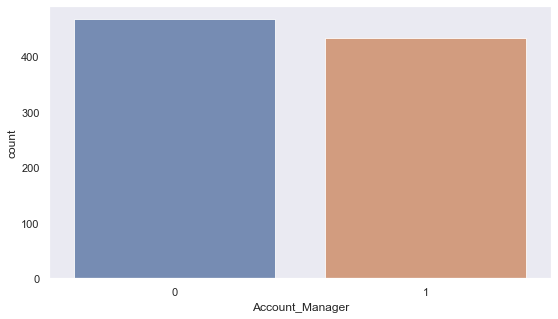

In [16]:
plt.figure(figsize=(9,5))
sns.countplot(customer_df['Account_Manager'], alpha=0.8)

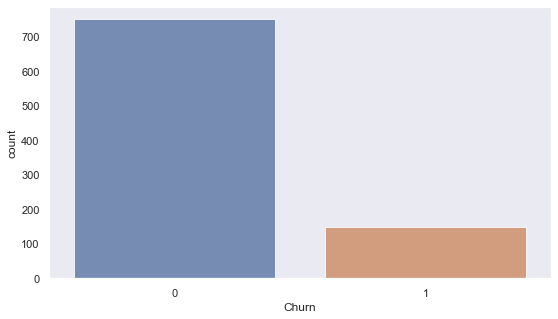

In [17]:
plt.figure(figsize=(9,5))
sns.countplot(customer_df['Churn'], alpha=0.8)

### Visualize the relationship between feature and target variables

In [18]:
left_df = customer_df[customer_df['Churn'] == 1]
stayed_df = customer_df[customer_df['Churn'] == 0]

In [19]:
print('The proportion of churned customers:')
print(round(len(left_df)/len(customer_df), 2))
print('The proportion of customers who stayed:')
print(round(len(stayed_df)/len(customer_df),2))

The proportion of churned customers:
0.17
The proportion of customers who stayed:
0.83


In [20]:
# KDE (Kernel Density Estimate) is used for visualizing the Probability Density of a continuous variable. 
# KDE describes the probability density at different values in a continuous variable. 
def create_two_kdeplots(df, col):
    ''' 
    Makes two kdeplots stacked on one another.
    
    Args:
    
    df(dataframe): pandas dataframe
    col(str): column name
    
    '''
    plt.figure(figsize=(12,7))

    sns.kdeplot(left_df[col], label = 'Customers who left', shade = True, color = 'r')
    sns.kdeplot(stayed_df[col], label = 'Customers who Stayed', shade = True, color = 'b')

    plt.xlabel(col)

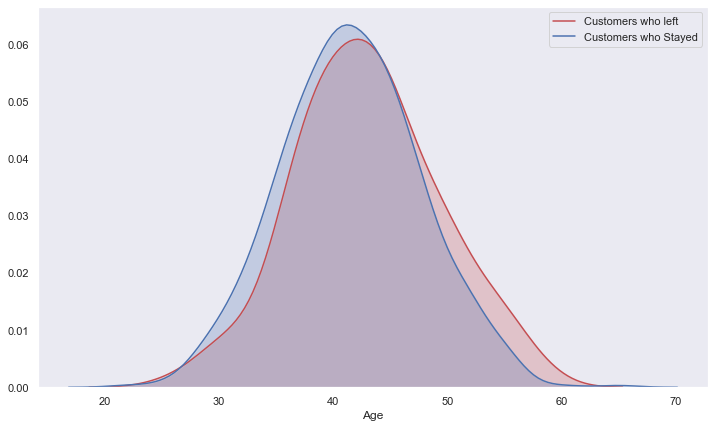

In [21]:
create_two_kdeplots(customer_df, 'Age')

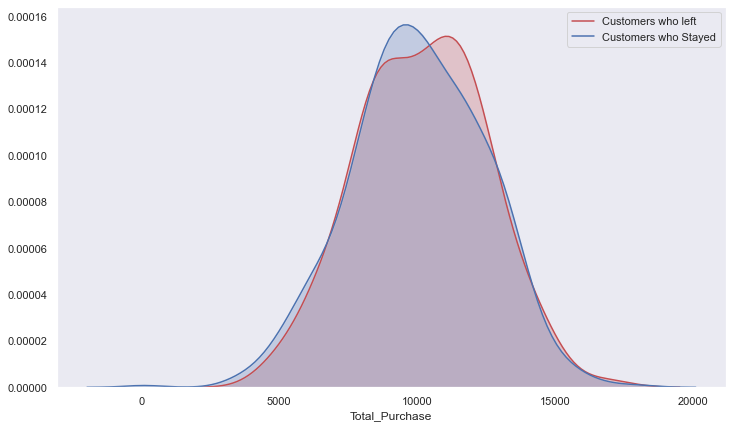

In [22]:
create_two_kdeplots(customer_df, 'Total_Purchase')

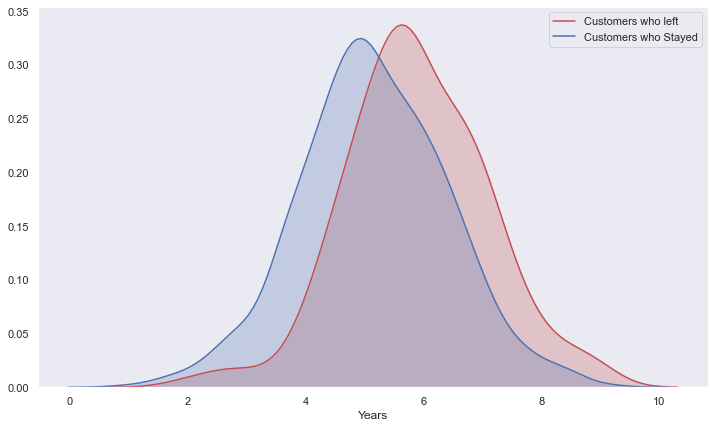

In [23]:
create_two_kdeplots(customer_df, 'Years')

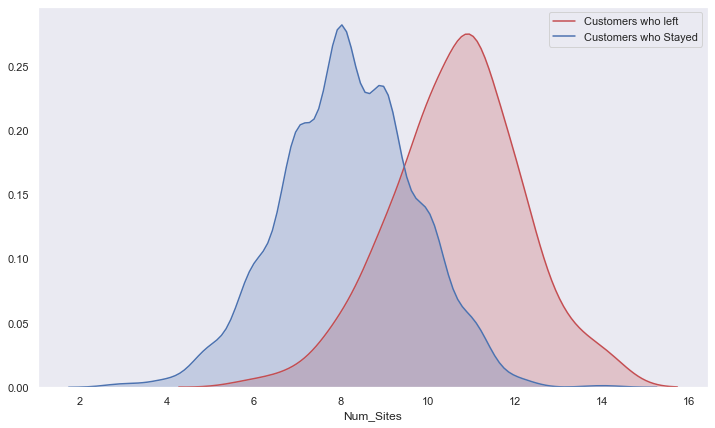

In [24]:
create_two_kdeplots(customer_df, 'Num_Sites')

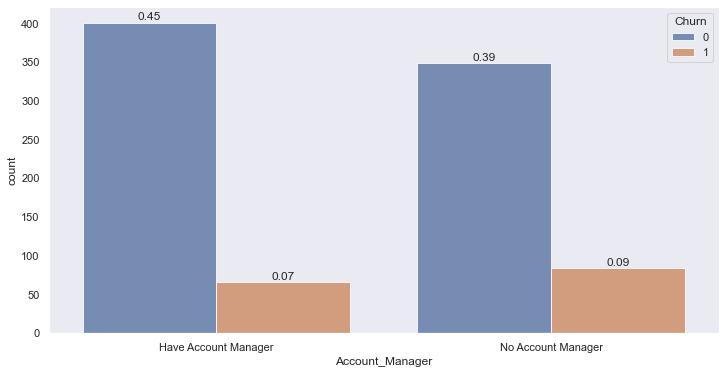

In [25]:
plt.figure(figsize=(12,6))
x_labels = ['Have Account Manager', 'No Account Manager']
ax = sns.countplot(x='Account_Manager', hue='Churn',
                   data=customer_df, alpha=0.8)
ax.set_xticklabels(x_labels)
total = len(customer_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

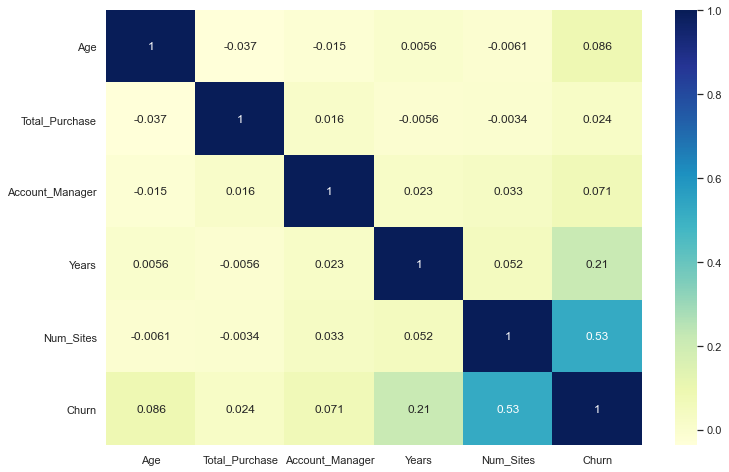

In [26]:
correlations = customer_df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlations, annot = True, cmap="YlGnBu")

# ---- 5 Establish a baseline ----
Since this is a project to predict numeric values. We will establish a baseline with a simple logistic regression model.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
warnings.simplefilter(action='ignore', category=FutureWarning)

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/__init__.py:42: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  warnings.warn("Starting from version 2.2.1, the library file in distribution wheels for macOS "


In [28]:
features = customer_df.drop(columns=['Names', 'Onboard_date', 'Company','Location', 'Churn', 'State']).copy()
target = customer_df['Churn'].copy()


In [29]:
feat_train, feat_test, target_train, target_test = train_test_split(features, target,
                                                                    test_size=0.3,
                                                                    random_state=42,
                                                                    shuffle=True
                                                                    )

In [30]:
feat_train.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites
687,43.00,"9,891.30",0,5.75,11.00
705,46.00,"7,638.13",1,4.91,9.00
296,38.00,"11,803.58",1,6.97,6.00
172,43.00,"6,298.75",1,4.51,9.00
863,48.00,"11,316.41",1,4.74,10.00


In [31]:
lr = LogisticRegression(penalty='l2', random_state=42,
                        verbose=2, n_jobs=-1)

In [32]:
lr.fit(feat_train, target_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(n_jobs=-1, random_state=42, verbose=2)

In [33]:
lr_predictions = lr.predict(feat_test)

In [34]:
def print_metrics(y_true, y_pred, model_name):
    """Print machine learning metrics.
       
       Args:
    
       y_true(1d array): Ground truth (correct) labels.
       y_pred(1d array): Predicted labels.
       model_name(string): the name of the model
    """
    print(f'-----{model_name}-----')
    print('\n')
    print(f'Accuracy score is: {accuracy_score(y_true, y_pred):2.2f}')
    print(f'Precision score is: {precision_score(y_true, y_pred):2.2f}')
    print(f'Recall score is: {recall_score(y_true, y_pred):2.2f}')
    print(f'F1 score is: {f1_score(y_true, y_pred):2.2f}')

In [35]:
print_metrics(target_test, lr_predictions, 'Logistic Regression')

-----Logistic Regression-----


Accuracy score is: 0.84
Precision score is: 0.47
Recall score is: 0.16
F1 score is: 0.24


## ---- 6 Hypothesize solution ----

There is still a lot of room to improve the performance:

1. During the exploratory analysis, we have noticed some variables have outliers. We can choose models which are robust to outliers such as random forest, XGboost.

2. We can scale numerical variables.

3. Create a new feature using the average churn rate by state.

4. It also makes sense that customers who have similar background/behavior may have similar action. So we will also test KNearest Neighbor.

# Part 3 - DEVELOP
## ---- 7 Feature Engineering ----

In [36]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = customer_df[customer_df['Churn']==0]
df_minority = customer_df[customer_df['Churn']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=747,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
customer_df = pd.concat([df_majority, df_minority_upsampled]).copy()
 
# Display new class counts
customer_df['Churn'].value_counts()

0    750
1    747
Name: Churn, dtype: int64

In [37]:
state_churn_mean = customer_df.groupby('State')['Churn'].mean().to_dict()

customer_df['state_churn'] = customer_df['State'].map(state_churn_mean)

In [38]:
customer_df.head(2)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,State,state_churn
150,Michael Williams,35.00,"15,571.26",0,6.45,9.00,2011-12-02 20:13:49,"5728 Michael Rue Riosland, NY 38804-1415",Petty and Sons,0,NY,0.47
151,Connie Golden,39.00,"10,268.87",1,3.68,6.00,2009-08-19 18:52:21,"3324 Gomez Knolls Suite 591 Farmerchester, LA ...",Brown-Wagner,0,LA,0.68


In [39]:
# Create a new feature using Total_Purchase divided by years

customer_df['purchase_per_year'] = customer_df['Total_Purchase']/customer_df['Years']

In [40]:
# Create a new feature using Num_Sites divided by years

customer_df['sites_per_year'] = customer_df['Num_Sites']/customer_df['Years']

In [41]:
# Create a new feature using Total_purchase divided by sites

customer_df['purchase_per_site'] = customer_df['Total_Purchase']/customer_df['Num_Sites']

In [42]:
customer_df.head(2)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn,State,state_churn,purchase_per_year,sites_per_year,purchase_per_site
150,Michael Williams,35.00,"15,571.26",0,6.45,9.00,2011-12-02 20:13:49,"5728 Michael Rue Riosland, NY 38804-1415",Petty and Sons,0,NY,0.47,"2,414.15",1.40,"1,730.14"
151,Connie Golden,39.00,"10,268.87",1,3.68,6.00,2009-08-19 18:52:21,"3324 Gomez Knolls Suite 591 Farmerchester, LA ...",Brown-Wagner,0,LA,0.68,"2,790.45",1.63,"1,711.48"


In [43]:
customer_df.columns = customer_df.columns.str.lower()

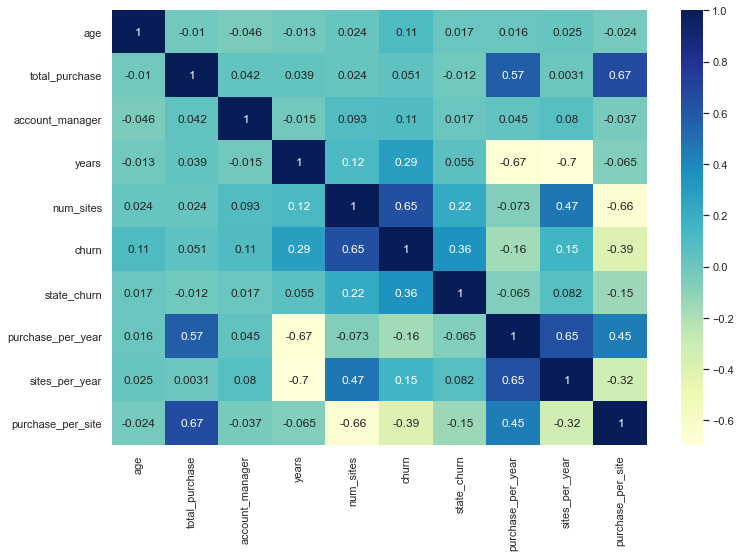

In [44]:
correlations = customer_df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlations, annot = True, cmap="YlGnBu")

In [62]:
customer_cleaned = customer_df.drop(columns=['names', 'onboard_date', 'company','location', 'state_churn'])
customer_cleaned.to_csv('customer_cleaned.csv', index=False)

In [46]:
features = customer_df.drop(columns=['names', 'onboard_date', 'company','location', 'churn', 'state']).copy()
target = customer_df['churn'].copy()

In [47]:
feat_train, feat_test, target_train, target_test = train_test_split(features, target,
                                                                    test_size=0.3,
                                                                    random_state=42,
                                                                    stratify=target
                                                                    )

In [48]:
feat_train.head(2)

,age,total_purchase,account_manager,years,num_sites,state_churn,purchase_per_year,sites_per_year,purchase_per_site
633,33.00,"10,309.71",1,2.96,7.00,0.44,"3,483.01",2.36,"1,472.82"
433,41.00,"10,028.23",1,5.52,9.00,0.36,"1,816.71",1.63,"1,114.25"


In [49]:
feat_test.head(2)

,age,total_purchase,account_manager,years,num_sites,state_churn,purchase_per_year,sites_per_year,purchase_per_site
402,46.00,"8,418.81",1,7.19,6.00,0.44,"1,170.91",0.83,"1,403.13"
392,37.00,"13,036.52",1,3.83,6.00,0.40,"3,403.79",1.57,"2,172.75"


In [50]:
target_train.mean()

0.498567335243553

In [51]:
target_test.mean()

0.5

In [52]:
#ss = StandardScaler()
#feat_train = ss.fit_transform(feat_train)
#feat_test = ss.transform(feat_test)

In [53]:
def select_model(train_X, train_y):

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=42),
            "hyperparameters":
                {
                    "n_estimators": [100],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        },
        {
            "name": "LGBMClassifier",
            "estimator": LGBMClassifier(random_state=42),
            "hyperparameters":
                {
                    'learning_rate': [0.005, 0.01, 0.1],
                    'n_estimators': [40],
                    'num_leaves': [6,8,12,16],
                    'boosting_type' : ['gbdt'],
                    'objective' : ['binary'],
                    'random_state' : [42], # Updated from 'seed'
                    'colsample_bytree' : [0.65, 0.66],
                    'subsample' : [0.7,0.75],
                    'reg_alpha' : [1,1.2],
                    'reg_lambda' : [1,1.2,1.4]
                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))
        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            scoring='f1',
                            cv=5)
        grid.fit(train_X, train_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}".format(model["best_params"]))
        print("Best Estimator: {}".format(model['best_model']))

    return models


In [54]:
result = select_model(feat_train, target_train)

KNeighborsClassifier
--------------------
Best Score: 0.920940663043979
Best Parameters: {'algorithm': 'kd_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
Best Estimator: KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1, weights='distance')
RandomForestClassifier
----------------------
Best Score: 0.9377672095549695
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=10, max_features='log2', random_state=42)
LGBMClassifier
--------------
Best Score: 0.904853798906134
Best Parameters: {'boosting_type': 'gbdt', 'colsample_bytree': 0.65, 'learning_rate': 0.1, 'n_estimators': 40, 'num_leaves': 16, 'objective': 'binary', 'random_state': 42, 'reg_alpha': 1, 'reg_lambda': 1.2, 'subsample': 0.7}
Best Estimator: LGBMClassifier(colsample_bytree=0.65, n_estimators=40, num_leaves=16,
               objective='binary', random_state=42, reg_alpha=1, reg_lambda=1.

In [55]:
best_model = RandomForestClassifier(max_depth=10, max_features='log2', random_state=42)

In [56]:
best_model.fit(feat_train, target_train)

RandomForestClassifier(max_depth=10, max_features='log2', random_state=42)

In [57]:
rfc_preds = best_model.predict(feat_test)

In [58]:
print_metrics(target_test, rfc_preds, 'Random Forest Classifier')

-----Random Forest Classifier-----


Accuracy score is: 0.97
Precision score is: 0.95
Recall score is: 0.99
F1 score is: 0.97


In [59]:
def plot_importance(model, train_X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':train_X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

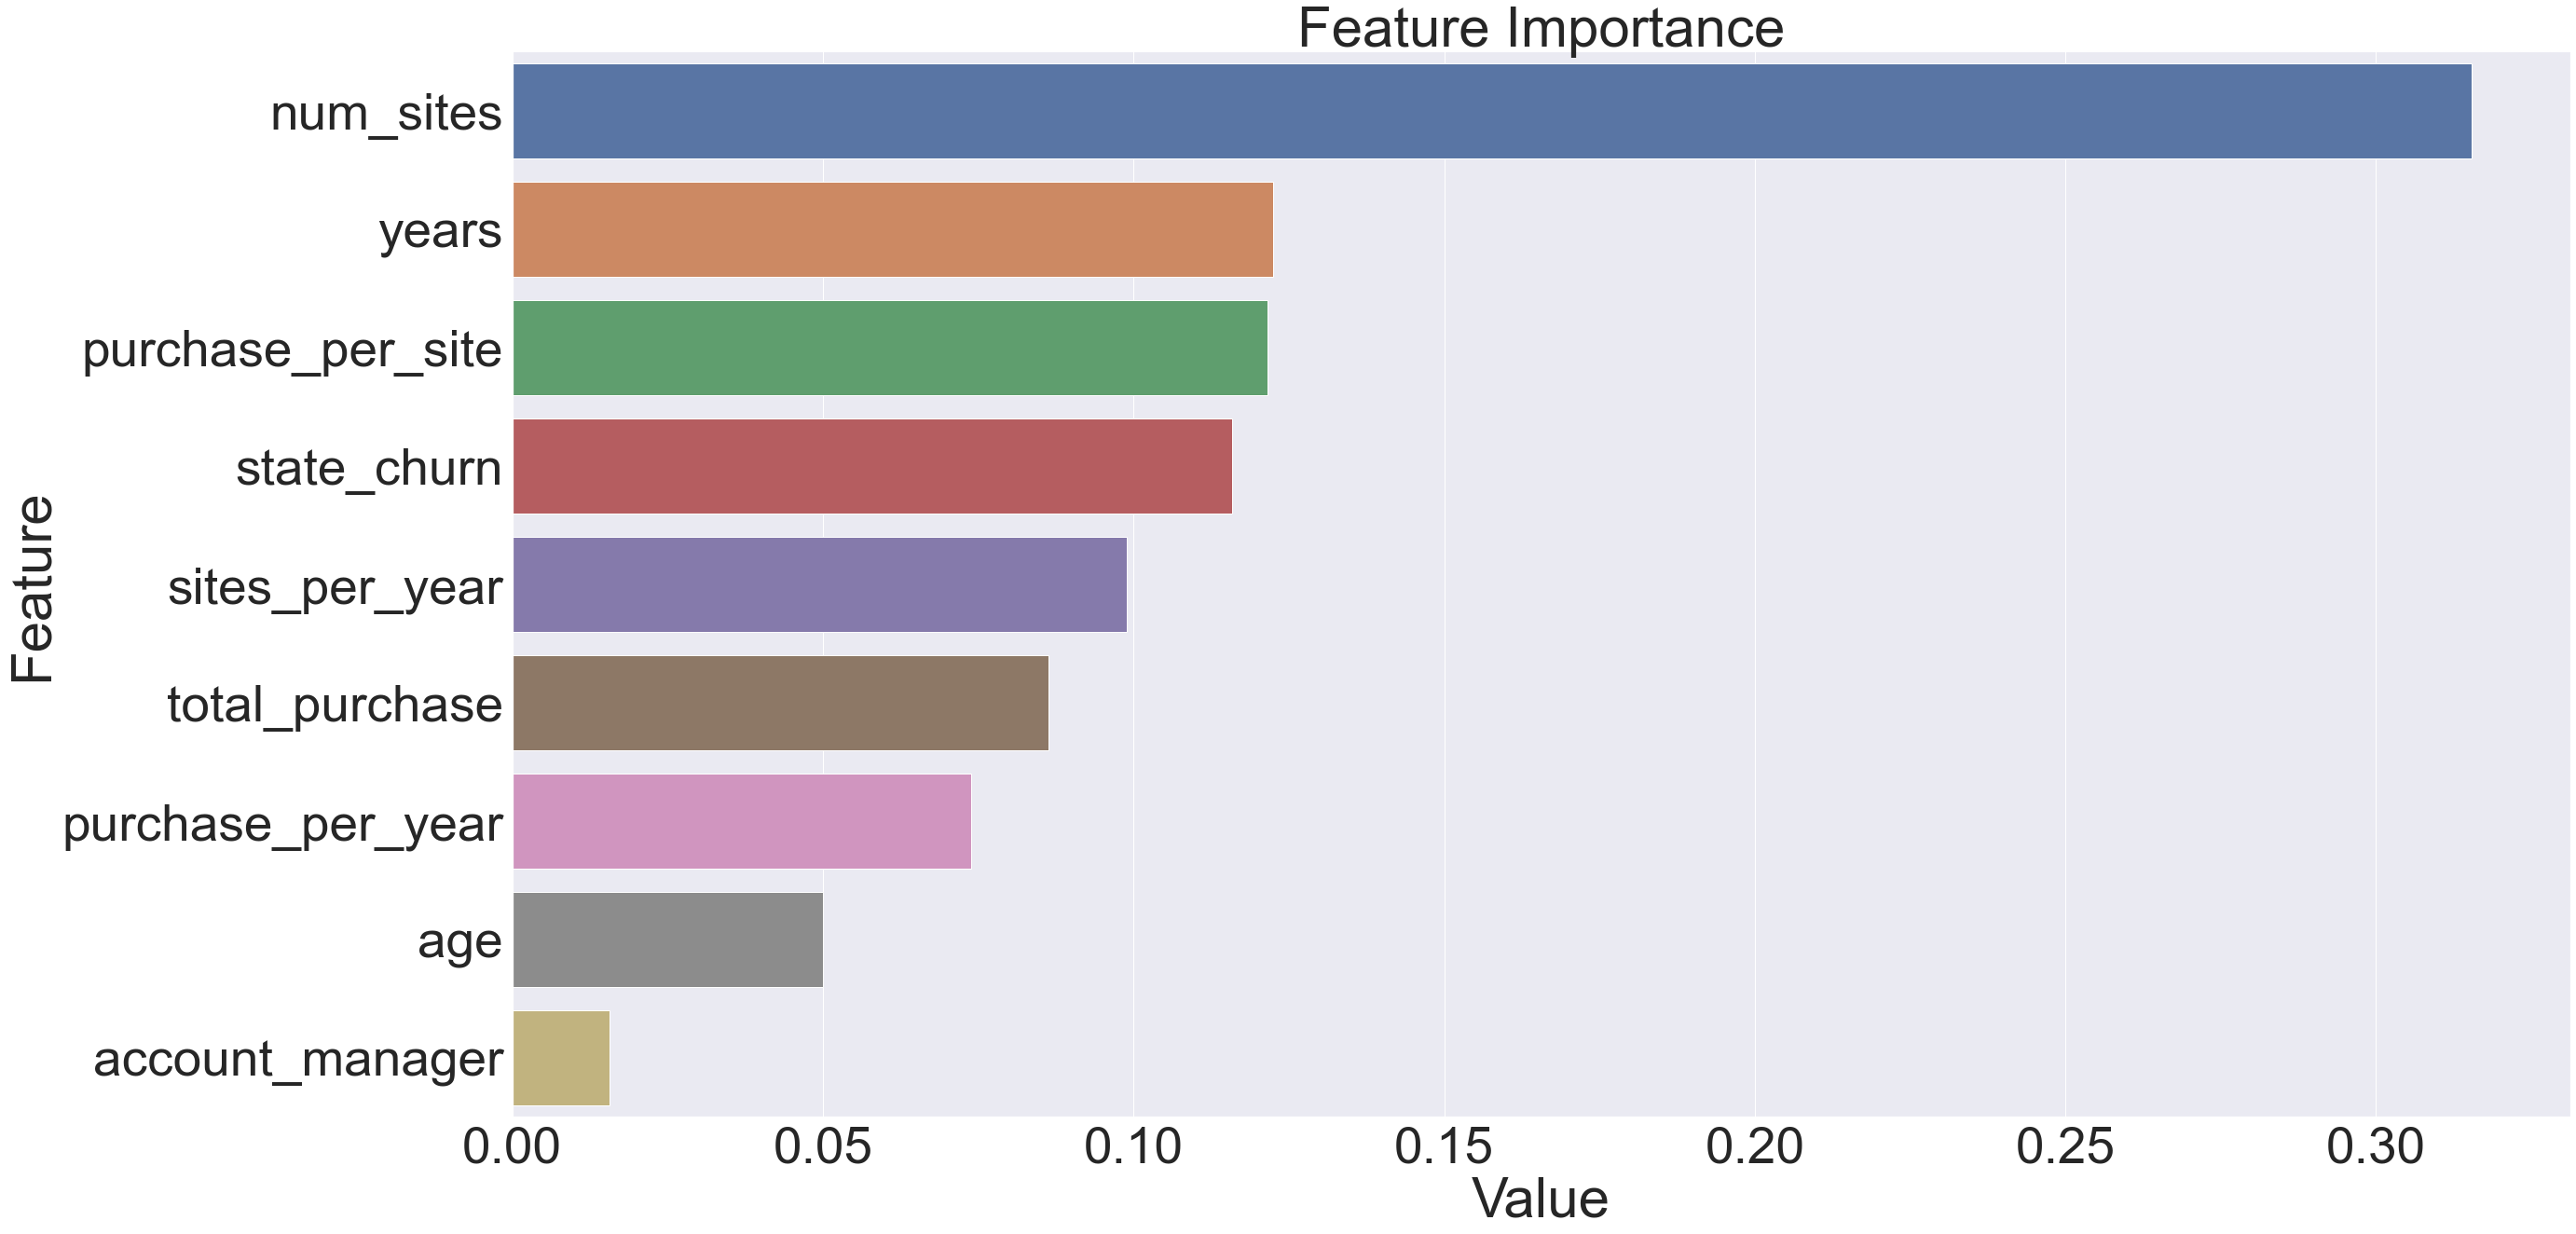

In [60]:
plot_importance(best_model, features)

In [61]:
## Save trained model to a pickle file

import pickle
pickle.dump(best_model, open('churn_rfc.pkl', 'wb'))